# <center>KIỂM ĐỊNH GIẢ THUYẾT</center>


# I. Hypothesis testing là gì?
Trong Hypothesis testing, ta đưa ra một giả định về thông số của quần thể.  
- Trung bình cân nặng, chiều cao  
- Thời gian chờ khám
- ...

Ta thu thập dữ liệu và tính xác suất để thông số của dữ liệu xảy ra khi giả định là **Đúng**.

# II. Quy trình Hypothesis testing
- Đặt Null hypothesis: H0 = không có sự khác biệt
- Đặt Research hypothesis: H1 = có sự khác biệt
- Thu thập dữ liệu
- Tính p-value của thông số trong H1 nếu H0 là đúng
- Kết luận: **Từ chối** H0 hoặc **không từ chối** H0

Ở đây, chúng ta thường chọn p <0.05 là từ chối H0, có nghĩa là H1 đúng ( có sự khác biệt).  
**Tuy nhiên**, p >0.05 không có nghĩa là H1 sai, mà có thể dữ liệu chưa đủ lớn để chứng minh nó sai. ( do Central Limit Theorem)  
Con số 0.05 này chỉ là một giá trị cut-off do lịch sử đặt ra, phải interpret cẩn thận.

---
# III. Ví dụ đơn giản
- H0: Khoa NNgTk có thời gian điều trị trung bình = 5 ngày
- H1: Khoa NNgTk có thời gian điều trị trung bình > 5 ngày
- Thu thập dữ liệu thời gian điều trị của bệnh nhân tháng 12/2019 tại khoa NNgTk

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

In [2]:
data = pd.read_excel("tgdt-nngtk-t12.xlsx")
data.head()

,MABN,NGAYDT
0,18067560,2
1,19048073,8
2,18039088,1
3,17002853,5
4,18115092,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 2 columns):
MABN      189 non-null int64
NGAYDT    189 non-null int64
dtypes: int64(2)
memory usage: 3.1 KB


In [4]:
data['NGAYDT'].describe()

count    189.000000
mean       5.677249
std        4.584498
min        1.000000
25%        3.000000
50%        5.000000
75%        7.000000
max       31.000000
Name: NGAYDT, dtype: float64

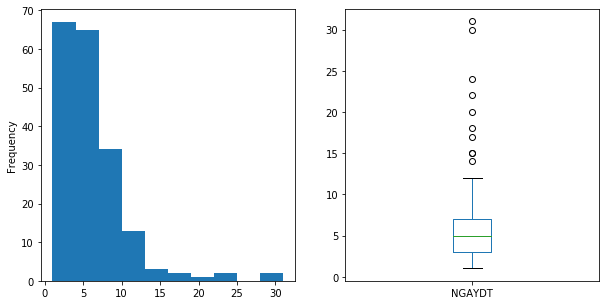

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
data['NGAYDT'].plot(kind='hist', ax=ax[0])
data['NGAYDT'].plot(kind='box', ax=ax[1]);

**Nhìn chung số ngày điều trị có outliers, tuy nhiên cứ để đó thử xem.**

In [6]:
# H0: phân phối normal có mean = 5, std = sample std/ sqrt(n)
h0 = st.norm(loc=5, scale=data['NGAYDT'].std()/sqrt(data['NGAYDT'].count()))

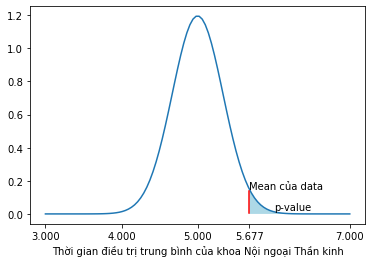

In [7]:
# Giả sử H0 đúng, thì H1 của mình nằm ở đâu?

# Vẽ H0
arr = np.linspace(3,7,100)
plt.plot(arr, h0.pdf(arr))
plt.xlabel("Thời gian điều trị trung bình của khoa Nội ngoại Thần kinh")

# Vẽ điểm H1 = data.mean
h1 = data['NGAYDT'].mean()
plt.axvline(x=h1, ymin= 0.05, ymax=h0.pdf(h1), color='red')
plt.xticks([3,4,5,h1,7])
plt.text(h1, 0.15, "Mean của data")

# Vẽ p-value
pvarr = np.linspace(h1,7,50)
plt.fill_between(pvarr, h0.pdf(pvarr) , facecolor='lightblue' )
plt.text(6, 0.02, "p-value");

In [8]:
# tính p-value
p_val = h0.sf(h1)
p_val

0.02113285894821083

**=> P-value <0.05, vậy data mà ta thu thập được: 5.677 và 5 khác biệt có ý nghĩa thống kê.**

---
# IV. Ví dụ 2:
NCHS reported that the mean total cholesterol level in 2002 for all adults was 203.  
Suppose a new drug is proposed to lower total cholesterol, and a study is designed to evaluate the efficacy of the drug in lowering cholesterol. Fifteen patients are enrolled in the study and asked to take the new drug for 6 weeks. At the end of 6 weeks, each
patient’s total cholesterol level is measured and the sample statistics are as follows: n = 15, m= 195.9, and s = 28.7.
- H0: cholesterol = 203
- H1: cholesterol  $\neq$ 203

In [9]:
# H0 có phân phối normal của mean = 203, std = std sample/sqrt(n) 
h0 = st.norm(loc=203, scale=28.7/sqrt(15))

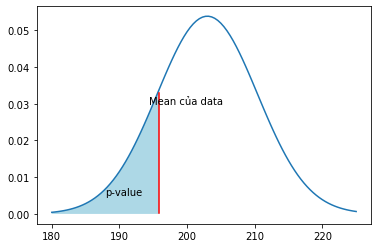

In [10]:
arr = np.linspace(180,225,100)
plt.plot(arr, h0.pdf(arr))

h1 = 195.9
plt.axvline(x=h1, ymin= 0.05, ymax=0.6, color='red')
plt.text(h1-1.5, 0.03, "Mean của data");

pvarr = np.linspace(180, h1,50)
plt.fill_between(pvarr, h0.pdf(pvarr) , facecolor='lightblue' )
plt.text(h1-8, 0.005, "p-value");

In [11]:
p_value = h0.cdf(200.3)
p_value

0.3577956015930849

**=>p-value >0.05, vậy 195.9 và 203 khác biệt không có ý nghĩa thống kê.**

---
# V. Kết luận:
Hypothesis testing dựa trên Central Limit Theorem.
### Tuy nhiên, một số vấn đề cần lưu ý:
- **Statistical significance** và **clinical significance** là 2 khái niệm hoàn toàn khác nhau.  
    Ví dụ đầu tiên, mặc dù 5.677 khác 5 có ý nghĩa thống kê nhưng không có giá trị thực tế
- P-value > 0.05 không có nghĩa là giống nhau mà là chưa đủ dữ kiện để kết luận khác nhau.  
    Ví dụ 2, p >0.05 là do cỡ mẫu nhỏ
- Việc tính toán thì dễ, nhưng sampling methods, study designs là yếu tố quyết định phương thức có hợp lý với câu hỏi nghiên cứu hay không.  
    Rõ ràng ví dụ 2 lấy mẫu bệnh nhân so với trung bình của cộng đồng là sai.  
    Nên thực hiện nghiên cứu trước và sau can thiệp.